In [3]:
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import statistics
import numpy as np
import sys
import random
from scipy.optimize import curve_fit
import pickle
import glob
sys.path.insert(0, "../kitti/")
from util_kitti import kitti_label_file_parser, init_xz_plt, gac_original_anchor_parser, init_zy_plt, load_tf_image


img_tf = load_tf_image()

LABEL_DIR = "/home/lab530/KenYu/kitti/training/label_2/"
labels = []
for fn in glob.glob(LABEL_DIR + "*.txt"):
    for label in kitti_label_file_parser(fn, is_transform = False):
        # filter labal via gac_original's critiria
        if label.occluded >= 2 or label.z3d <= 3 or label.category != "Car":
            continue
        else:
            labels.append(label)

print(f"Number of total ground trues = {len(labels)}")
print("=====================================")

NameError: name 'load_tf_image' is not defined

## Anchor and Groundtrue ZY plane distribution

# Compare different Anchor on ZY plane

Useful anchor = 18974 / 46080 


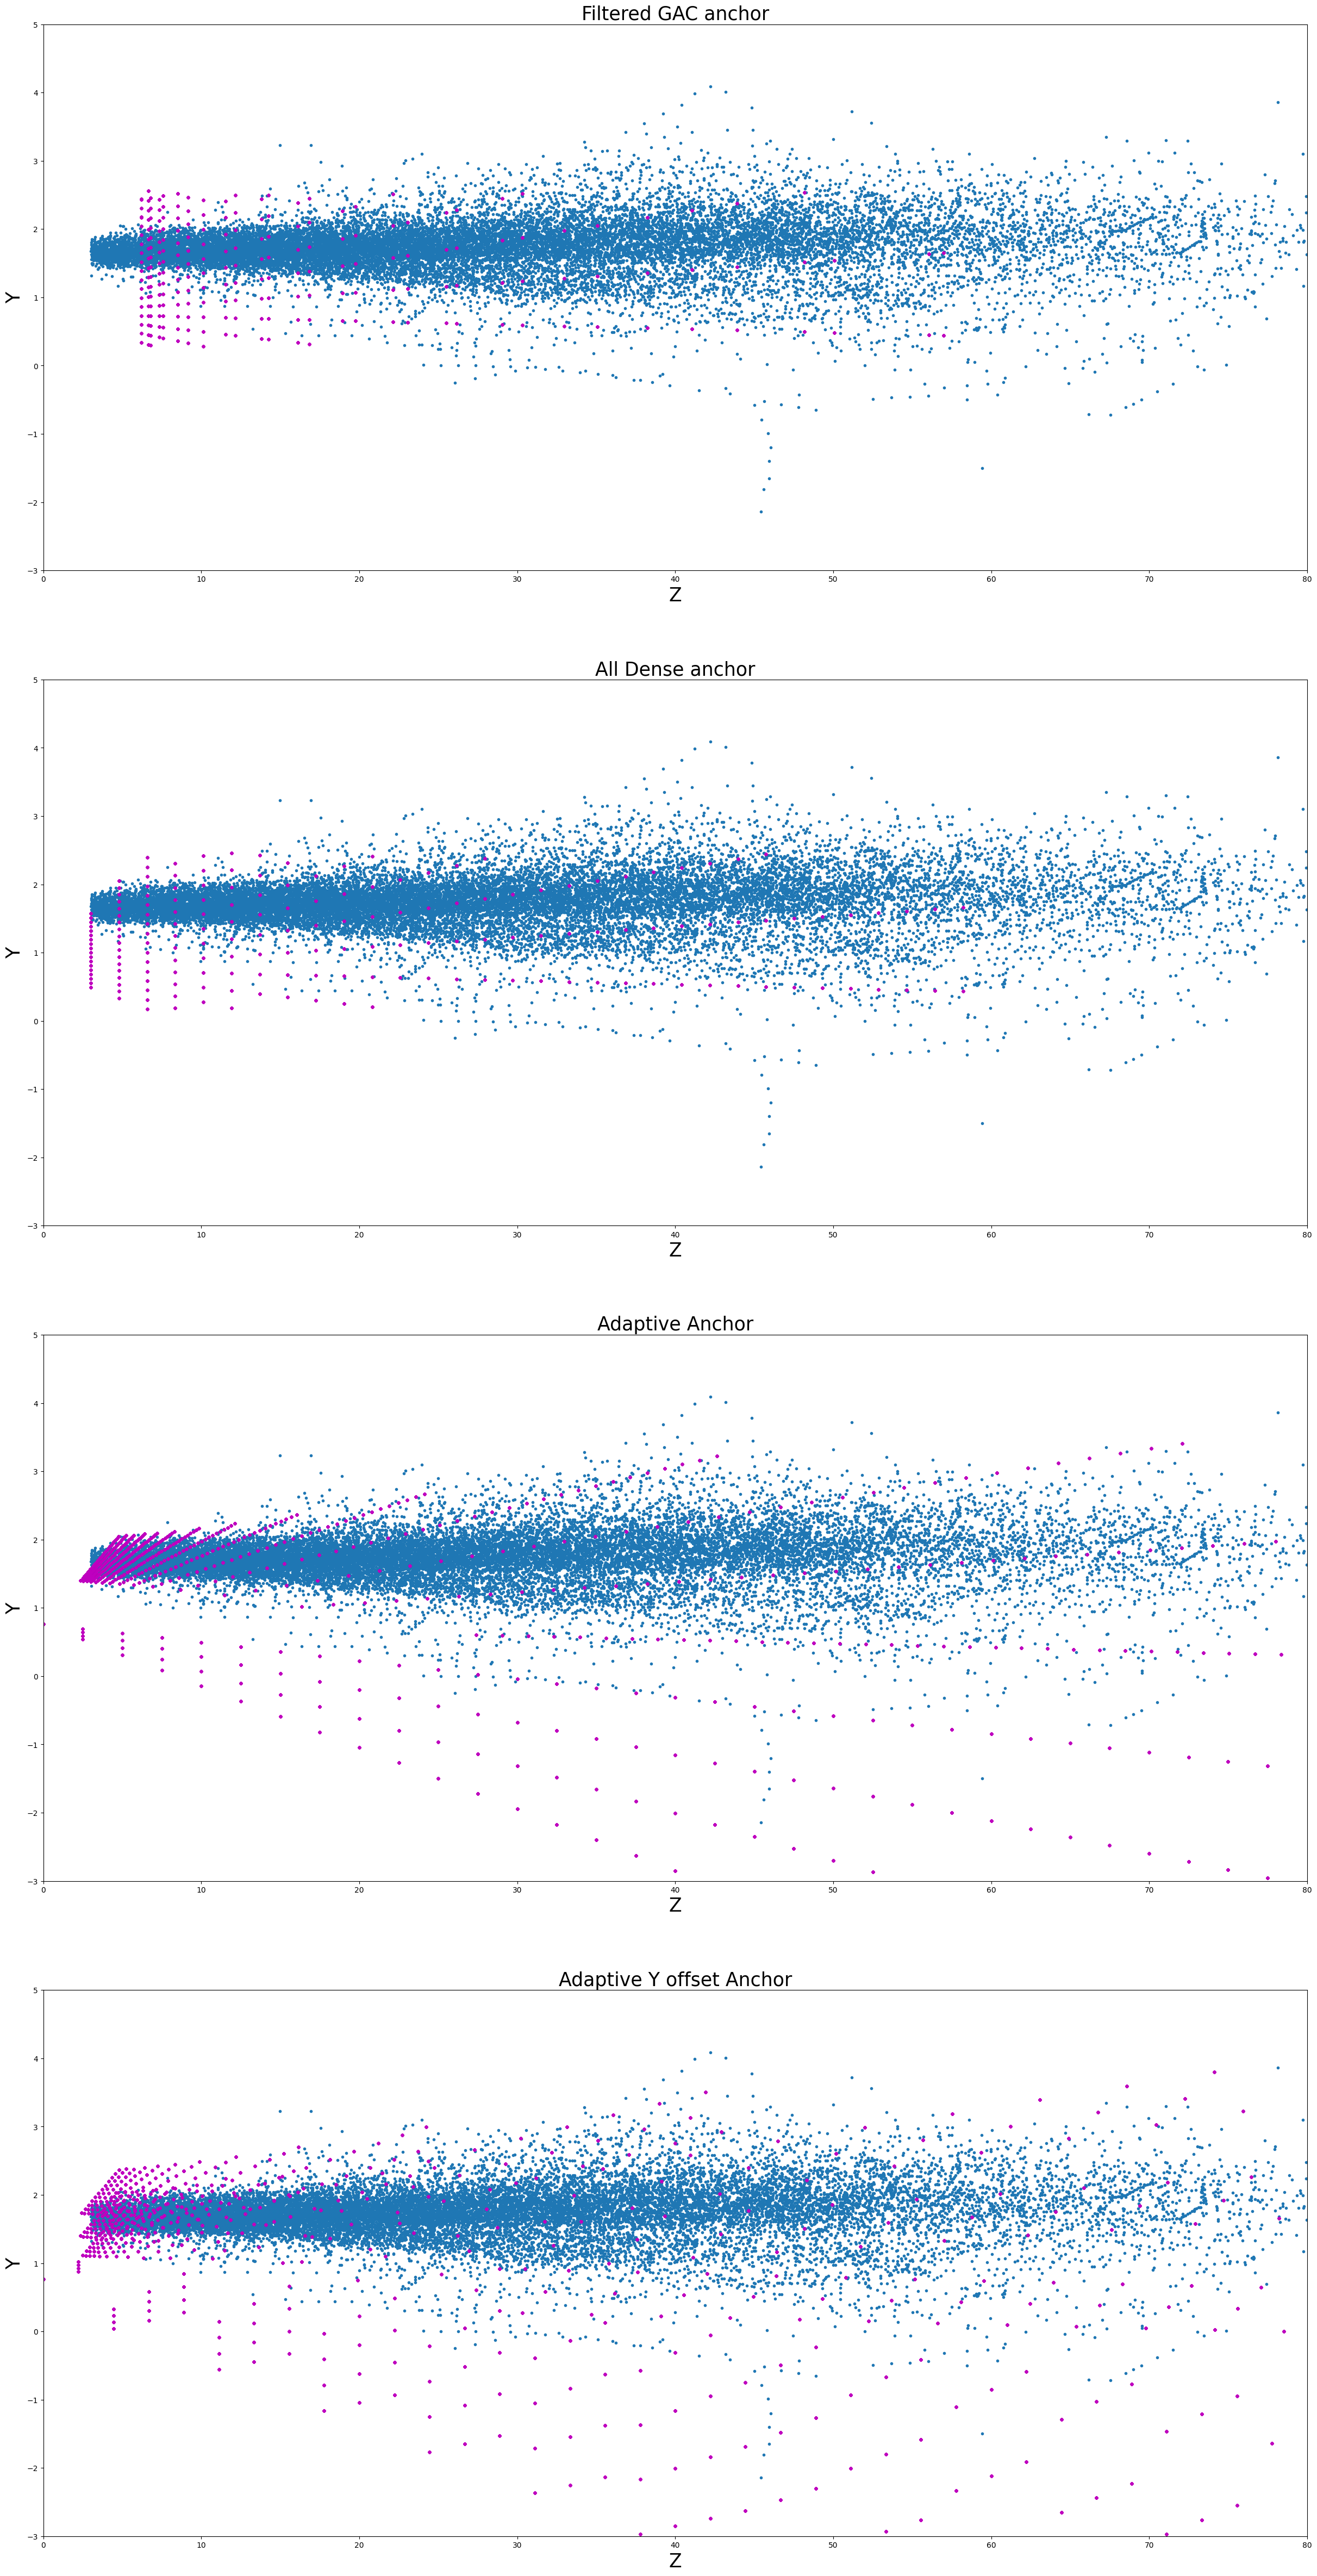

In [ ]:
# Note that I define Y as bottom of 3d bounding box because you should get rid of height variation
#  

# Load GAC's anchor
anchor_2D, anchor_3D, anchor_mask, anchor_gac = gac_original_anchor_parser("/home/lab530/KenYu/visualDet3D/anchor/max_occlusion_2_anchor.pkl", is_transform = True)

# Load adaptive anchor
with open("/home/lab530/KenYu/ml_toolkit/anchor_generation/pkl/anchors_adaptive.pkl", 'rb') as f:
    anchors_adaptive = pickle.load(f)

# Load dense anchor
with open("/home/lab530/KenYu/ml_toolkit/anchor_generation/pkl/anchors_bev_dense.pkl", "rb") as f:
    anchors_dense = pickle.load(f)

# Load dense anchor
with open("/home/lab530/KenYu/ml_toolkit/anchor_generation/pkl/anchors_adaptive_Yoffset.pkl", "rb") as f:
    anchors_adaptive_Yoffset = pickle.load(f)

# anchors_tensor.append([a.xmin, a.ymin, a.xmax, a.ymax, 0, 
#                         a.cx, a.cy, a.cz, a.w, a.h, a.l, a.alpha,
#                         a.x3d, a.y3d, a.z3d, a.rot_y])

axs = init_zy_plt(["Filtered GAC anchor", "All Dense anchor", "Adaptive Anchor", "Adaptive Y offset Anchor"])

# Draw Ground true
axs[0].plot([l.z3d for l in labels], [l.y3d for l in labels], '.') # Draw ground true
axs[1].plot([l.z3d for l in labels], [l.y3d for l in labels], '.') # Draw ground true
axs[2].plot([l.z3d for l in labels], [l.y3d for l in labels], '.') # Draw ground true
axs[3].plot([l.z3d for l in labels], [l.y3d for l in labels], '.') # Draw ground true

# Draw anchors
axs[0].plot([a.z3d for a in anchor_gac], [a.y3d for a in anchor_gac], '.m',) # Draw filtered GAC anchor
axs[1].plot(anchors_dense[:, 14], anchors_dense[:, 13], '.m',)
axs[2].plot(anchors_adaptive[:, 14], anchors_adaptive[:, 13], '.m',)
axs[3].plot(anchors_adaptive_Yoffset[:, 14], anchors_adaptive_Yoffset[:, 13], '.m',)



# XZ plane distribution

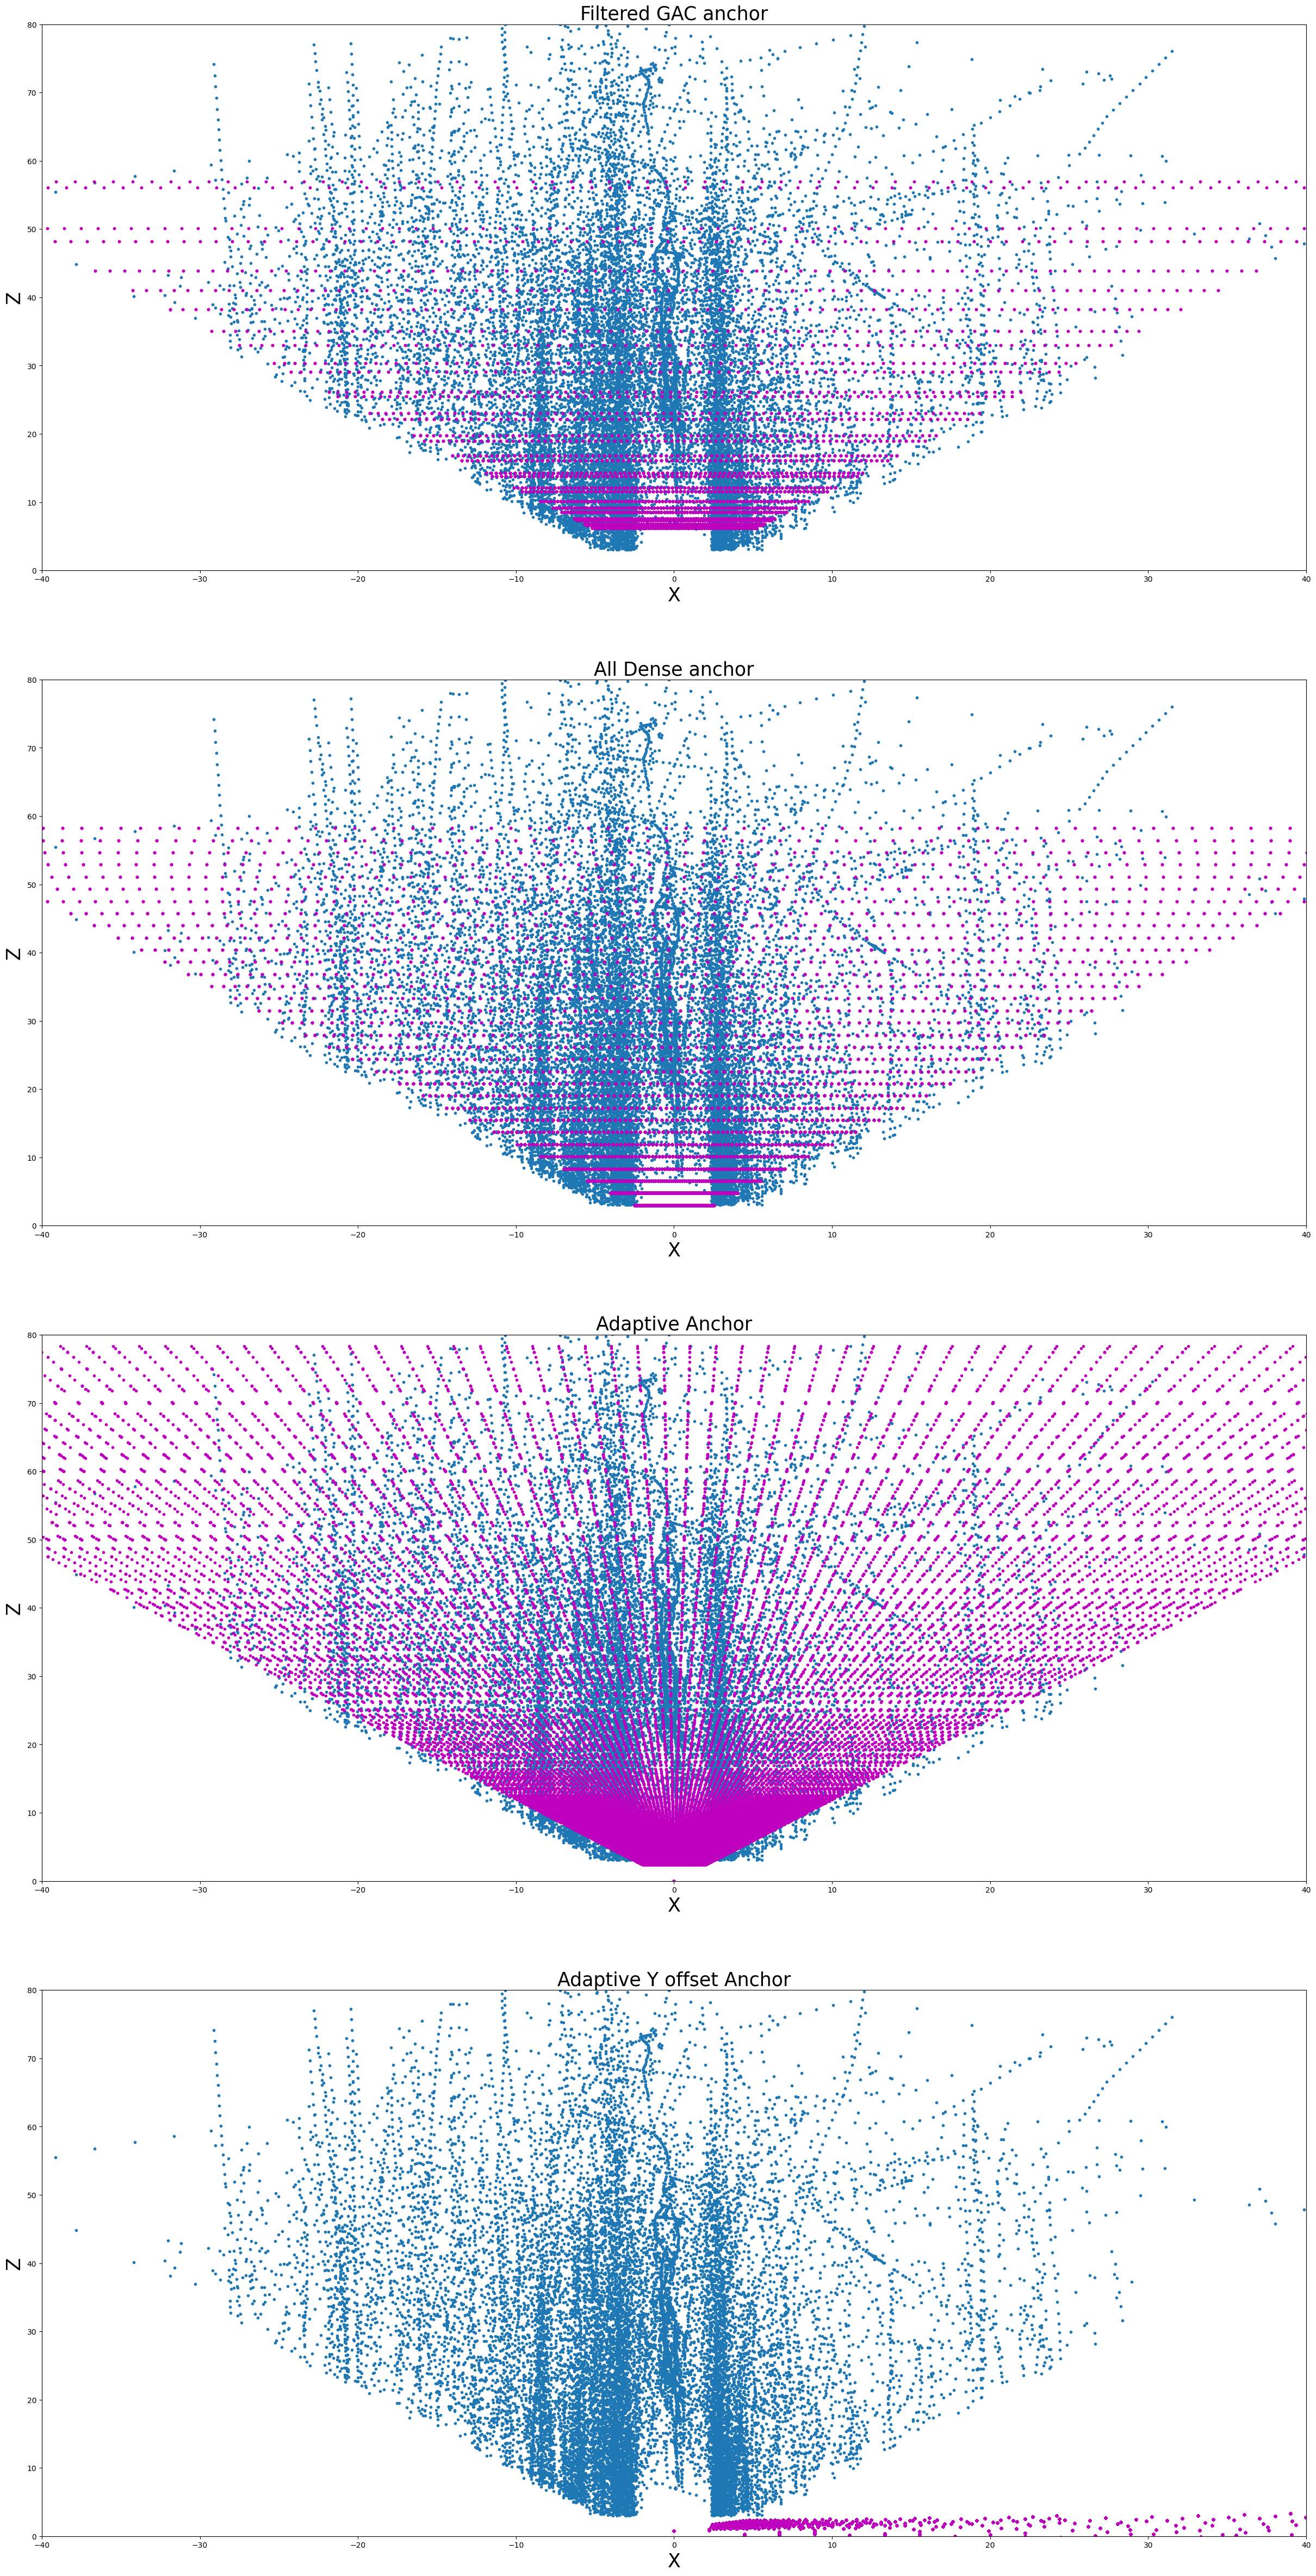

In [ ]:
# # Load GAC's anchor
# anchor_2D, anchor_3D, anchor_mask, anchor_gac = gac_original_anchor_parser("/home/lab530/KenYu/visualDet3D/anchor/max_occlusion_2_anchor.pkl", is_transform = True)

# # Load adaptive anchor
# with open("/home/lab530/KenYu/ml_toolkit/anchor_generation/pkl/anchors_adaptive.pkl", 'rb') as f:
#     anchors_adaptive = pickle.load(f)

# # Load dense anchor
# with open("/home/lab530/KenYu/ml_toolkit/anchor_generation/pkl/anchors_bev_dense.pkl", "rb") as f:
#     anchors_dense = pickle.load(f)

# anchors_tensor.append([a.xmin, a.ymin, a.xmax, a.ymax, 0, 
#                         a.cx, a.cy, a.cz, a.w, a.h, a.l, a.alpha,
#                         a.x3d, a.y3d, a.z3d, a.rot_y])

axs = init_xz_plt(["Filtered GAC anchor", "All Dense anchor", "Adaptive Anchor", "Adaptive Y offset Anchor"])

# Draw Ground true
axs[0].plot([l.x3d for l in labels], [l.z3d for l in labels], '.') # Draw ground true
axs[1].plot([l.x3d for l in labels], [l.z3d for l in labels], '.') # Draw ground true
axs[2].plot([l.x3d for l in labels], [l.z3d for l in labels], '.') # Draw ground true
axs[3].plot([l.x3d for l in labels], [l.z3d for l in labels], '.') # Draw ground true

# Draw anchors
axs[0].plot([a.x3d for a in anchor_gac], [a.z3d for a in anchor_gac], '.m',) # Draw filtered GAC anchor
axs[1].plot(anchors_dense[:, 12], anchors_dense[:, 14], '.m',)
axs[2].plot(anchors_adaptive[:, 12], anchors_adaptive[:, 14], '.m',)
axs[3].plot(anchors_adaptive_Yoffset[:, 14], anchors_adaptive_Yoffset[:, 13], '.m',)
